# **Nelson Grajales - Walmart Kaggle Competition**

For this project there were four datasets:

* Stores.csv
    * The Store Number, Type of store, and Size of the Store
* train.csv
    * Contains the training set. Store, Dept, Date, Weekly_Sales, IsHoliday
* test.csv
    * Contains the Testing set. Same as train.csv but without Weekly_Sales 
* features.csv
    * Features has most of the data. Store, Date, Temperature, Fuel Price, MarkDown1-5, CPI, Unemployment, IsHoliday 



**Lets Start By reading in the Data and performing some Data Exploration**

In [1]:

import numpy as np
import pandas as pd
import os
from time import time
import visuals as vs
import utility as ut

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

#Start by reading in the Data and do some intial data exploration 

In [2]:
print(os.listdir("../ops"))

['.DS_Store', '.ipynb_checkpoints', '__pycache__', 'features.csv', 'output.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv', 'utility.py', 'visuals.py', 'walmart-recruiting-store-sales-forecasting', 'walmart-recruiting-store-sales-forecasting.zip', 'Walmart_Prediction_Nelson_Grajales.ipynb']


In [3]:
walmart_data1 = pd.read_csv('train.csv')

In [4]:
walmart_data1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
columns = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

for col in columns:
    print('For Column: '+ col + ', the data format is: ')
    print(walmart_data1[col].dtype)
    
# will need to convert date to datetime later

For Column: Store, the data format is: 
int64
For Column: Dept, the data format is: 
int64
For Column: Date, the data format is: 
object
For Column: Weekly_Sales, the data format is: 
float64
For Column: IsHoliday, the data format is: 
bool


In [6]:
walmart_data1.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [7]:
walmart_features = pd.read_csv('features.csv')
walmart_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
walmart_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
feature_columns = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                  'CPI', 'Unemployment']

walmart_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


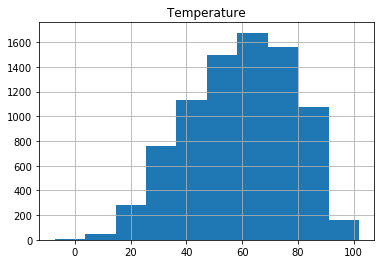

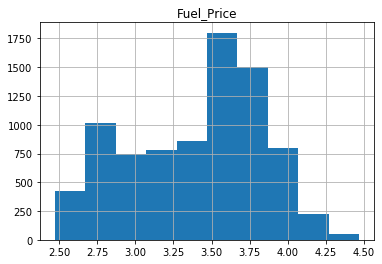

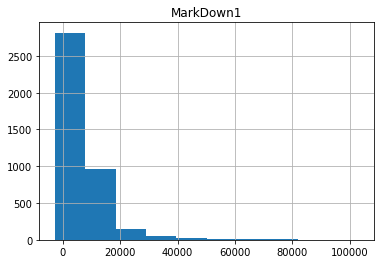

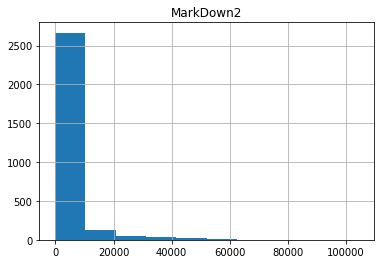

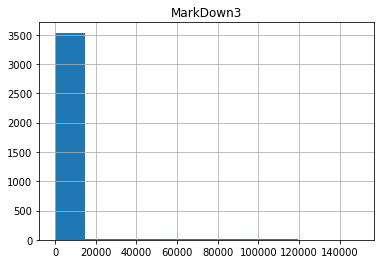

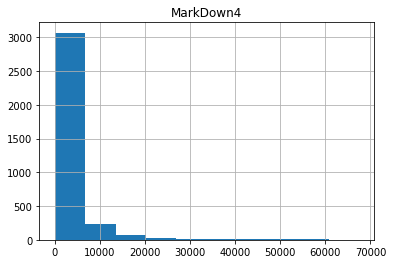

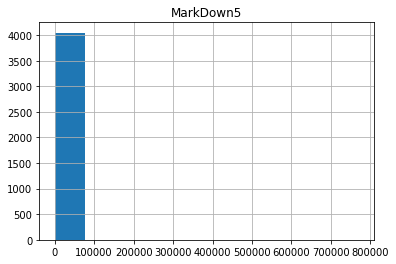

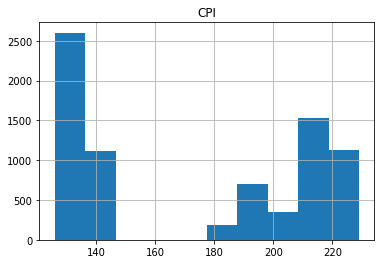

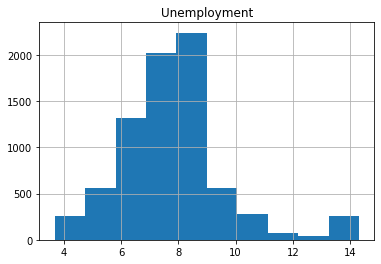

In [10]:
for col in feature_columns:
    walmart_features.hist(column=col)

In [11]:
'''
Most of the data looks to be Normally distributed so thats good. 
Only issue with the Markdown data is all of them are right skewed. Will need to take another look
'''



'\nMost of the data looks to be Normally distributed so thats good. \nOnly issue with the Markdown data is all of them are right skewed. Will need to take another look\n'

In [12]:
walmart_stores = pd.read_csv('stores.csv')
walmart_stores.groupby(['Type']).describe()

# Looks like A is large, B is medium and C is Small

Store                                                        Size  \
     count       mean        std   min    25%   50%    75%   max count   
Type                                                                     
A     22.0  22.227273  13.078269   1.0  11.50  25.0  32.75  41.0  22.0   
B     17.0  18.352941  11.028039   3.0  10.00  17.0  23.00  45.0  17.0   
C      6.0  39.000000   5.215362  30.0  37.25  40.0  42.75  44.0   6.0   

                                                                           \
               mean           std      min        25%       50%       75%   
Type                                                                        
A     177247.727273  49392.621098  39690.0  155840.75  202406.0  203819.0   
B     101190.705882  32371.137916  34875.0   93188.00  114533.0  123737.0   
C      40541.666667   1304.145033  39690.0   39745.00   39910.0   40774.0   

                
           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

In [13]:
# Reading in the Test Set
walmart_test = pd.read_csv('test.csv')

**End of Exploration**


**---------------------------------------------------------------------------**

**Data Preperation and Feature Engineering**

In [14]:
# Merge the features Dataset with the Walmart Stores datset 
walmart_data2 = pd.merge(left=walmart_features, right=walmart_stores, left_on='Store', right_on='Store')


In [15]:
# Merge the training set with the features set. This will exculde data past 2013, 
# because the training set can only validate till 2012
walmart_data3 = walmart_data1.merge(walmart_data2, how='left')


In [16]:
# The combind Dataset
walmart_data3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [17]:
# Lets look at which columns have missing values
walmart_data3.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

'''
What to do with missing data? Most of the markdowns are missing more than 50% of the data 

Im going to try to impute the missing Data using MICE and see how the model performs.

Successfully imputed the data using MICE. I added the method to impute data as an option in the Clean_data method.

'''

In [28]:
# Utilize Clean_data Method from utility.py

#Dataset that has the imputed values 
walmart_train_impute = ut.clean_data(walmart_data3,True)

#Dataset that does not have the imputed values 
walmart_train_noImpute = ut.clean_data(walmart_data3, False)

In [21]:
# I will be trying out different datasets to see what may potential improve the model 

markdowns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

# Walmart Data without the Markdown Columns
walmart_no_markdowns = walmart_train_noImpute.drop(columns=markdowns, axis=1)

# Walmart Data with filling in the values with zeros
walmart_markdown_zero = walmart_train_noImpute.fillna(0)



'''
Datasets that I will be testing are:

* walmart_markdown_zero 
    * missing values are replaced with 0's
* walmart_no_markdowns
    * reomved the markdown Data
* walmart_train_Impute
    * imputed missing markdown data
'''


In [30]:
# Lets take a look to see if there are any outliers 
# I will be using Tukeys methods (IQR)
for feature in walmart_train_impute.keys():
        
    # 25 percentile 
    Q1 = np.percentile(walmart_train_impute[feature], 25)
    
    # 75th percentile
    Q3 = np.percentile(walmart_train_impute[feature], 75)
    
    # 1.5 times the interquartile range
    step = 1.5*(Q3-Q1)
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(walmart_train_impute[~((walmart_train_impute[feature] >= Q1 - step) & (walmart_train_impute[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'Store':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


Data points considered outliers for the feature 'Dept':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


Data points considered outliers for the feature 'Weekly_Sales':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
8,1.0,1.0,57258.43,0.0,62.27,2.719,9679.538154,6992.171463,973.918983,6272.236256,7603.272749,210.820450,7.808,1.0,151315.0,13.0
46,1.0,1.0,55931.23,0.0,52.33,2.886,5680.718742,6433.284591,4131.227428,2656.346547,8398.792432,211.405122,7.838,1.0,151315.0,51.0
63,1.0,1.0,50510.31,0.0,72.99,3.807,9643.202032,-149.308223,-553.151477,3396.446147,4518.479466,215.459905,7.682,1.0,151315.0,16.0
106,1.0,1.0,54060.10,0.0,45.32,3.510,9873.330000,11062.270000,9.800000,8409.310000,3402.660000,220.425759,7.348,1.0,151315.0,7.0
113,1.0,1.0,57592.12,0.0,70.43,3.891,10121.970000,-723.610311,77.980000,3750.590000,4510.720000,221.435611,7.143,1.0,151315.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421285,45.0,95.0,49380.11,0.0,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,2.0,118221.0,39.0
421286,45.0,95.0,50241.01,0.0,64.89,3.985,5046.740000,-2557.843327,18.820000,2253.430000,2340.010000,192.170412,8.667,2.0,118221.0,40.0
421287,45.0,95.0,49334.77,0.0,54.47,4.000,1956.280000,-1295.377426,7.890000,599.320000,3990.540000,192.327265,8.667,2.0,118221.0,41.0
421288,45.0,95.0,48434.97,0.0,56.47,3.969,2004.020000,-1230.524970,3.180000,437.730000,1537.490000,192.330854,8.667,2.0,118221.0,42.0


Data points considered outliers for the feature 'IsHoliday':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
1,1.0,1.0,46039.49,1.0,38.51,2.548,10374.958729,20509.451050,14823.348185,8064.184686,5807.978766,211.242170,8.106,1.0,151315.0,6.0
31,1.0,1.0,18194.74,1.0,78.69,2.565,7281.295493,14391.461640,15746.150113,5226.676513,6715.155577,211.495190,7.787,1.0,151315.0,36.0
42,1.0,1.0,18820.29,1.0,64.52,2.735,6118.219720,15087.689106,16830.434708,3949.531247,6572.919160,211.748433,7.838,1.0,151315.0,47.0
47,1.0,1.0,19124.58,1.0,48.43,2.943,5579.790099,15988.847792,17421.937190,3111.923292,6096.390054,211.404932,7.838,1.0,151315.0,52.0
53,1.0,1.0,37887.17,1.0,36.39,3.022,10371.464854,18250.110104,14133.521550,6926.225475,4327.322990,212.936705,7.742,1.0,151315.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421510,45.0,98.0,1092.66,1.0,71.48,3.738,4614.210232,7613.680848,13552.050903,1546.360412,2959.662775,186.673738,8.625,2.0,118221.0,36.0
421521,45.0,98.0,794.62,1.0,48.71,3.492,140.870000,384.820000,26961.990000,28.590000,1110.120000,188.350400,8.523,2.0,118221.0,47.0
421526,45.0,98.0,553.21,1.0,37.79,3.389,3604.350000,43941.560000,287.450000,357.430000,750.010000,189.062016,8.523,2.0,118221.0,52.0
421532,45.0,98.0,770.86,1.0,37.00,3.640,15760.300000,6113.950000,5.430000,5656.350000,4685.580000,189.707605,8.424,2.0,118221.0,6.0


Data points considered outliers for the feature 'Temperature':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
59052,7.0,1.0,8976.04,0.0,-2.06,3.011,7143.078532,12990.001003,681.962018,5164.792777,3803.835263,191.762589,8.818,2.0,70713.0,5.0
59195,7.0,2.0,21568.46,0.0,-2.06,3.011,7159.574701,12933.685057,867.351768,5178.216065,3860.578394,191.762589,8.818,2.0,70713.0,5.0
59338,7.0,3.0,7555.18,0.0,-2.06,3.011,7140.286057,12996.436969,658.218544,5163.200998,3795.984212,191.762589,8.818,2.0,70713.0,5.0
59481,7.0,4.0,15306.89,0.0,-2.06,3.011,7150.271444,12961.784538,771.827762,5171.450137,3830.650918,191.762589,8.818,2.0,70713.0,5.0
59624,7.0,5.0,12835.06,0.0,-2.06,3.011,7146.506114,12972.885273,733.837083,5168.771518,3818.692394,191.762589,8.818,2.0,70713.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68120,7.0,94.0,-2.50,0.0,-2.06,3.011,7090.016756,13033.773446,424.471825,5151.799040,3699.131279,191.762589,8.818,2.0,70713.0,5.0
68243,7.0,95.0,33881.30,0.0,-2.06,3.011,7135.149949,12882.172692,925.581084,5187.980302,3852.975365,191.762589,8.818,2.0,70713.0,5.0
68386,7.0,96.0,1412.71,0.0,-2.06,3.011,7091.038811,13027.517216,442.783053,5153.238685,3704.214340,191.762589,8.818,2.0,70713.0,5.0
68529,7.0,97.0,4601.19,0.0,-2.06,3.011,7094.886629,13013.286500,488.726355,5156.610270,3718.070090,191.762589,8.818,2.0,70713.0,5.0


Data points considered outliers for the feature 'Fuel_Price':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


Data points considered outliers for the feature 'MarkDown1':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
104,1.0,1.0,23510.49,0.0,56.55,3.360,34577.06,3579.210000,160.53,32403.87,5630.40,220.172015,7.348,1.0,151315.0,5.0
117,1.0,1.0,17147.44,0.0,75.55,3.749,21290.13,752.108841,69.89,4977.35,3261.04,221.671800,7.143,1.0,151315.0,18.0
130,1.0,1.0,16628.31,0.0,86.11,3.417,27584.78,119.980000,30.23,12007.04,4661.71,221.949864,6.908,1.0,151315.0,31.0
134,1.0,1.0,16680.24,0.0,80.49,3.638,21442.73,102.320000,21.70,13209.64,3032.96,222.305481,6.908,1.0,151315.0,35.0
247,1.0,2.0,54322.24,0.0,56.55,3.360,34577.06,3579.210000,160.53,32403.87,5630.40,220.172015,7.348,1.0,151315.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421519,45.0,98.0,897.22,0.0,47.65,3.530,23052.25,5449.620000,189.24,3355.69,3864.60,188.063234,8.523,2.0,118221.0,45.0
421531,45.0,98.0,772.51,0.0,42.96,3.617,35348.47,4373.640000,21.05,38157.91,5908.50,189.612228,8.424,2.0,118221.0,5.0
421535,45.0,98.0,654.52,0.0,41.55,3.816,22832.38,2515.250000,4.00,13317.88,2560.48,190.171493,8.424,2.0,118221.0,9.0
421557,45.0,98.0,516.46,0.0,76.58,3.654,24853.05,39.560000,17.96,11142.69,2768.32,191.164090,8.684,2.0,118221.0,31.0


Data points considered outliers for the feature 'MarkDown2':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
1,1.0,1.0,46039.49,1.0,38.51,2.548,10374.958729,20509.451050,14823.348185,8064.184686,5807.978766,211.242170,8.106,1.0,151315.0,6.0
53,1.0,1.0,37887.17,1.0,36.39,3.022,10371.464854,18250.110104,14133.521550,6926.225475,4327.322990,212.936705,7.742,1.0,151315.0,6.0
99,1.0,1.0,23350.88,1.0,44.55,3.129,5762.100000,46011.380000,260.360000,983.650000,4735.780000,219.535990,7.866,1.0,151315.0,52.0
100,1.0,1.0,16567.69,0.0,49.01,3.157,6277.390000,21813.160000,143.100000,1450.130000,8483.000000,219.714258,7.348,1.0,151315.0,1.0
144,1.0,2.0,44682.74,1.0,38.51,2.548,10372.693187,20515.561494,14801.892484,8062.697956,5801.105649,211.242170,8.106,1.0,151315.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421391,45.0,97.0,5569.82,1.0,37.79,3.389,3604.350000,43941.560000,287.450000,357.430000,750.010000,189.062016,8.523,2.0,118221.0,52.0
421392,45.0,97.0,6701.06,0.0,35.88,3.422,7328.140000,33378.790000,34.600000,1198.480000,6819.100000,189.194056,8.424,2.0,118221.0,1.0
421436,45.0,98.0,553.25,1.0,27.73,2.773,7431.969574,19267.217336,13509.046845,6605.264892,4677.279267,181.982317,8.992,2.0,118221.0,6.0
421526,45.0,98.0,553.21,1.0,37.79,3.389,3604.350000,43941.560000,287.450000,357.430000,750.010000,189.062016,8.523,2.0,118221.0,52.0


Data points considered outliers for the feature 'MarkDown3':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
1,1.0,1.0,46039.49,1.0,38.51,2.548,10374.958729,20509.451050,14823.348185,8064.184686,5807.978766,211.242170,8.106,1.0,151315.0,6.0
31,1.0,1.0,18194.74,1.0,78.69,2.565,7281.295493,14391.461640,15746.150113,5226.676513,6715.155577,211.495190,7.787,1.0,151315.0,36.0
39,1.0,1.0,34238.88,0.0,58.74,2.689,6355.823897,6888.766191,3303.295627,3654.308088,8653.069155,211.956394,7.838,1.0,151315.0,44.0
41,1.0,1.0,19552.84,0.0,51.41,2.771,6115.197196,7438.038217,3345.343198,3308.919032,8396.430954,211.889674,7.838,1.0,151315.0,46.0
42,1.0,1.0,18820.29,1.0,64.52,2.735,6118.219720,15087.689106,16830.434708,3949.531247,6572.919160,211.748433,7.838,1.0,151315.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421469,45.0,98.0,335.33,1.0,46.15,3.039,3195.526670,14307.648762,16020.600103,2365.039808,5316.280095,182.783277,8.724,2.0,118221.0,47.0
421474,45.0,98.0,74.55,1.0,29.67,3.179,2633.144005,15611.896098,16697.463082,1682.919673,5035.474248,182.571448,8.724,2.0,118221.0,52.0
421480,45.0,98.0,388.80,1.0,30.30,3.239,7436.293812,16374.790489,12815.327336,5468.897195,3255.699114,183.701613,8.549,2.0,118221.0,6.0
421510,45.0,98.0,1092.66,1.0,71.48,3.738,4614.210232,7613.680848,13552.050903,1546.360412,2959.662775,186.673738,8.625,2.0,118221.0,36.0


Data points considered outliers for the feature 'MarkDown4':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
104,1.0,1.0,23510.49,0.0,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,1.0,151315.0,5.0
108,1.0,1.0,20113.03,0.0,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,1.0,151315.0,9.0
130,1.0,1.0,16628.31,0.0,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,1.0,151315.0,31.0
134,1.0,1.0,16680.24,0.0,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,222.305481,6.908,1.0,151315.0,35.0
247,1.0,2.0,54322.24,0.0,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,1.0,151315.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421255,45.0,95.0,51125.95,0.0,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,2.0,118221.0,9.0
421396,45.0,97.0,6253.66,0.0,42.96,3.617,35348.47,4373.64,21.05,38157.91,5908.50,189.612228,8.424,2.0,118221.0,5.0
421400,45.0,97.0,6161.44,0.0,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,2.0,118221.0,9.0
421531,45.0,98.0,772.51,0.0,42.96,3.617,35348.47,4373.64,21.05,38157.91,5908.50,189.612228,8.424,2.0,118221.0,5.0


Data points considered outliers for the feature 'MarkDown5':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
95,1.0,1.0,25293.49,0.0,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,1.0,151315.0,48.0
96,1.0,1.0,33305.92,0.0,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,1.0,151315.0,49.0
238,1.0,2.0,45928.14,0.0,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,1.0,151315.0,48.0
239,1.0,2.0,49357.43,0.0,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,1.0,151315.0,49.0
381,1.0,3.0,10146.54,0.0,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,1.0,151315.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420965,45.0,93.0,1279.26,0.0,50.19,3.452,6835.61,120.76,802.79,2490.15,17861.50,188.502435,8.523,2.0,118221.0,48.0
421099,45.0,94.0,2541.46,0.0,50.19,3.452,6835.61,120.76,802.79,2490.15,17861.50,188.502435,8.523,2.0,118221.0,48.0
421242,45.0,95.0,46719.49,0.0,50.19,3.452,6835.61,120.76,802.79,2490.15,17861.50,188.502435,8.523,2.0,118221.0,48.0
421387,45.0,97.0,5980.75,0.0,50.19,3.452,6835.61,120.76,802.79,2490.15,17861.50,188.502435,8.523,2.0,118221.0,48.0


Data points considered outliers for the feature 'CPI':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


Data points considered outliers for the feature 'Unemployment':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number
29631,4.0,1.0,85839.78,0.0,67.69,3.864,11341.17,1642.940053,73.38,5677.89,7821.95,131.037548,4.308,1.0,205863.0,14.0
29632,4.0,1.0,50108.12,0.0,68.69,3.881,12506.74,5941.430000,30.84,3915.29,4392.95,131.108000,4.308,1.0,205863.0,15.0
29633,4.0,1.0,26161.45,0.0,68.60,3.864,2774.39,4279.410000,43.43,2409.97,4544.22,131.117333,4.308,1.0,205863.0,16.0
29634,4.0,1.0,26812.03,0.0,76.47,3.810,3993.66,97.770000,26.68,113.37,3947.45,131.126667,4.308,1.0,205863.0,17.0
29635,4.0,1.0,27487.23,0.0,80.14,3.747,13737.91,764.281763,93.65,6993.97,4541.89,131.136000,4.308,1.0,205863.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380967,40.0,99.0,0.05,0.0,66.11,3.884,10904.29,38.810000,23.95,2684.17,2912.76,138.377194,4.156,1.0,155083.0,35.0
380968,40.0,99.0,0.07,1.0,65.06,3.921,5494.10,10123.899512,39.66,925.80,3268.99,138.472936,4.156,1.0,155083.0,36.0
380969,40.0,99.0,0.06,0.0,59.38,3.988,5593.11,-2176.083905,62.88,290.65,7375.04,138.567300,4.156,1.0,155083.0,37.0
380970,40.0,99.0,280.00,0.0,57.21,4.027,4298.34,-2486.326812,12.03,1754.05,2273.79,138.825600,4.145,1.0,155083.0,40.0


Data points considered outliers for the feature 'Type':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


Data points considered outliers for the feature 'Size':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


Data points considered outliers for the feature 'Week_Number':


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week_Number


In [31]:
Weekly_sales = walmart_train_impute['Weekly_Sales']
features = walmart_train_impute.drop('Weekly_Sales', axis=1)

# Extract and build weights for IsHoliday
weight = features['IsHoliday'].replace(1, 5).replace(0,1)

# Drop Features to test if feature importance model helps to improve the model 
drop_features = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown4', 'CPI',
                'Unemployment', 'Type', 'MarkDown5']

features = features.drop(columns=drop_features)

In [32]:
features

,Store,Dept,IsHoliday,MarkDown3,Size,Week_Number
0,1.0,1.0,0.0,577.167498,151315.0,5.0
1,1.0,1.0,1.0,14823.348185,151315.0,6.0
2,1.0,1.0,0.0,1122.872901,151315.0,7.0
3,1.0,1.0,0.0,637.716947,151315.0,8.0
4,1.0,1.0,0.0,679.849246,151315.0,9.0
...,...,...,...,...,...,...
421565,45.0,98.0,0.0,1.500000,118221.0,39.0
421566,45.0,98.0,0.0,18.820000,118221.0,40.0
421567,45.0,98.0,0.0,7.890000,118221.0,41.0
421568,45.0,98.0,0.0,3.180000,118221.0,42.0


In [33]:
#split data before starting to perform model training 
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    Weekly_sales, 
                                                    test_size=.2, 
                                                    train_size=.8, 
                                                    random_state=42)

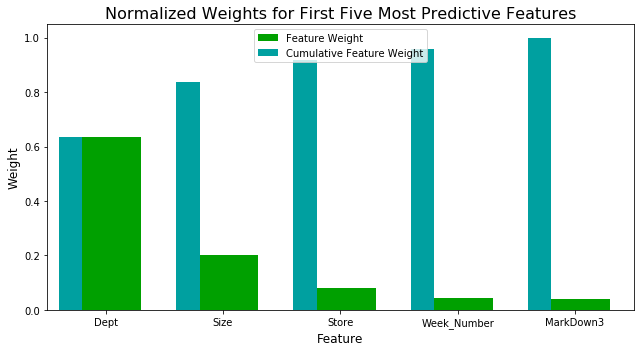

In [34]:
#Lets see what features might be useful 
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

feature_weights = model.feature_importances_

vs.feature_plot(feature_weights, X_train, y_train)


# **Start Model training** 

I will compare three different models to see which one performs the best. 


In [36]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, weights): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: target training set
       - X_test: features testing set
       - y_test: target test set
    '''
    
    results = {}
    
    # Compare time to train 
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    
    # Calculate the training time
    results['train_time'] = (end-start)
        
    # Calculate time for predictions 
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    # Calculate the total prediction time
    results['pred_time'] = (end-start)
            
    # Mean Absolute Error on the first 300 training samples which is y_train[:300]
    results['mean_absolute_train'] = mean_absolute_error(y_train[:300], predictions_train, )
        
    # Mean Absolute Error on test set, using the weights as specificed  from the competition 
    results['mean_absolute_test'] = mean_absolute_error(y_test,predictions_test, sample_weight= weights)
    
    # R2 score on the the first 300 training samples
    results['R2_Score_train'] = r2_score(y_train[:300], predictions_train)
        
    # R2 score on the test set which is y_test, using the weights as specificed  from the competition 
    results['R2_Score_test'] = r2_score(y_test, predictions_test, sample_weight = weights)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    return results

In [37]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Build Models to pass to method for comparison
Dec_model = DecisionTreeRegressor(random_state=42)
RfModel = RandomForestRegressor(random_state=42)
Linear_model = LinearRegression()

#Train the model on different ammount of samples 
samples_100 = len(y_train)
samples_10 = int(samples_100*.10)
samples_1 = int(samples_100*.01)

#Set the weights as mentioned from the competition 
weight = X_test['IsHoliday'].replace(1, 5).replace(0,1)

results = {}
for clf in [Dec_model, RfModel, Linear_model]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test, weight)
        


DecisionTreeRegressor trained on 3372 samples.
DecisionTreeRegressor trained on 33725 samples.
DecisionTreeRegressor trained on 337256 samples.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor trained on 3372 samples.
RandomForestRegressor trained on 33725 samples.
RandomForestRegressor trained on 337256 samples.
LinearRegression trained on 3372 samples.
LinearRegression trained on 33725 samples.
LinearRegression trained on 337256 samples.


In [38]:
# Output the results 
results

{'DecisionTreeRegressor': {0: {'train_time': 0.01615595817565918,
   'pred_time': 0.01786017417907715,
   'mean_absolute_train': 0.0,
   'mean_absolute_test': 6937.005587762566,
   'R2_Score_train': 1.0,
   'R2_Score_test': 0.6626661207472024},
  1: {'train_time': 0.14685702323913574,
   'pred_time': 0.028500080108642578,
   'mean_absolute_train': 0.0,
   'mean_absolute_test': 3463.0674777845516,
   'R2_Score_train': 1.0,
   'R2_Score_test': 0.79909046364252},
  2: {'train_time': 2.165327787399292,
   'pred_time': 0.08719420433044434,
   'mean_absolute_train': 0.0,
   'mean_absolute_test': 2130.3591285632474,
   'R2_Score_train': 1.0,
   'R2_Score_test': 0.9464115838056801}},
 'RandomForestRegressor': {0: {'train_time': 0.17613792419433594,
   'pred_time': 0.14809179306030273,
   'mean_absolute_train': 2431.017526666667,
   'mean_absolute_test': 6788.325647056106,
   'R2_Score_train': 0.9528647061121419,
   'R2_Score_test': 0.716362645744421},
  1: {'train_time': 1.0269651412963867,
  

/Users/nelsonraymondgrajales/Documents/Job stuff/Interviews/ops/visuals.py:83: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


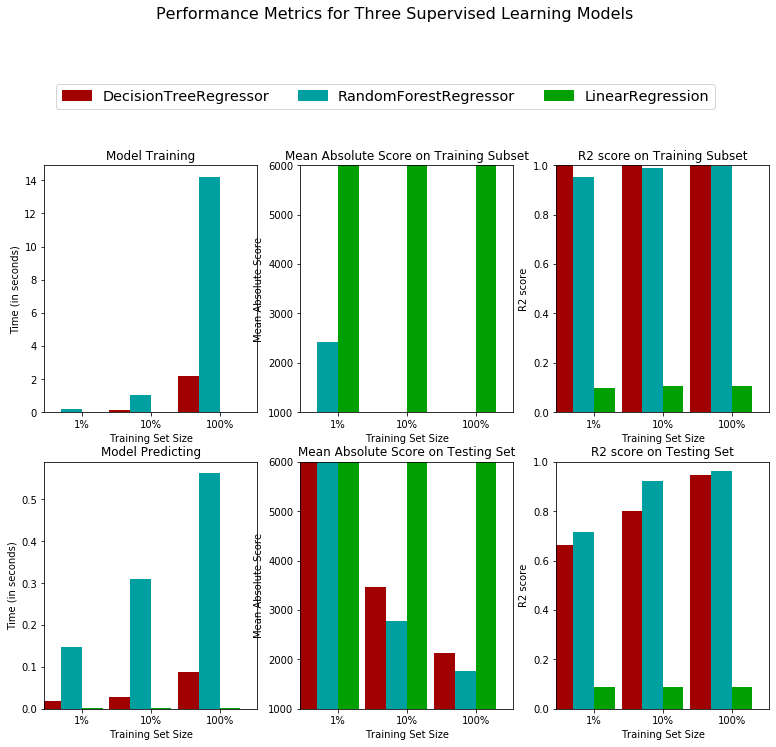

In [39]:
# Visualize the results 
vs.evaluate(results)


In [ ]:
# Random Forrest Seems to perform the best. Decision tree works very well, it works faster and got near similar results.
# I am going to choose Random_Forrest as it is more robust.

# **Issues**


I wanted to try and perform some hyper-parameter tuning, but my computer is a bit slow. It would have taken a couple of hours to run, so here is the code that I would use to test different hyper-parameters 

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Setting the range for n_estimators 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# I am only going to consider auto due to computation limitation. Options are sqrt, and log
max_features = ['auto']

# range of tree levels 
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]

# Minimum samples to split a node
min_samples_split = [2, 5, 10]

# Minimum samples at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Using Randomized Search, I could try to find a range a values to use, to then use grid search later on.
rf_model = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf_model, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               random_state=42)

rf_random.fit(X_train, y_train)

In [ ]:
# After randomized search has completed, Display the best parameters 
rf_random.best_params_

In [ ]:
# From the best params list I would then provided a smaller range to Grid search to then optimally tune the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [],
    'max_depth': [],
    'max_features': [],
    'min_samples_leaf': [],
    'min_samples_split': [],
    'n_estimators': []
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3)

grid_search.fit(X_train, y_train)

# Display best params
grid_search.best_params_

In [43]:
# Since I was unable to tune the model, I will be using the default values 
rf = RandomForestRegressor(random_state=42)

rf.fit(features, Weekly_sales)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [44]:
# Get the test set ready to predict

walmart_test_final = walmart_test.merge(walmart_data2, how='left')

# I will use MICE to impute the missing values in the dataset 
walmart_final = ut.clean_data(walmart_test_final,True)


In [45]:
# Using the features that were best at predicting from the Decesion tree model above
walmart_final = walmart_final.drop(columns=drop_features)
walmart_final

,Store,Dept,IsHoliday,MarkDown3,Size,Week_Number
0,1.0,1.0,0.0,50.82,151315.0,44.0
1,1.0,1.0,0.0,40.28,151315.0,45.0
2,1.0,1.0,0.0,103.78,151315.0,46.0
3,1.0,1.0,1.0,74910.32,151315.0,47.0
4,1.0,1.0,0.0,3838.35,151315.0,48.0
...,...,...,...,...,...,...
115059,45.0,98.0,0.0,3.00,118221.0,26.0
115060,45.0,98.0,0.0,582.74,118221.0,27.0
115061,45.0,98.0,0.0,85.72,118221.0,28.0
115062,45.0,98.0,0.0,204.19,118221.0,29.0


In [46]:
# Predict the Values 
results = pd.Series(rf.predict(walmart_final))

In [47]:
# Build the dataframe to output the data
output_data = walmart_final
output_data['Date'] = walmart_test['Date']
output_data['Id'] = walmart_test['Store'].astype(str) + '_' + walmart_test['Dept'].astype(str) + '_' + walmart_test['Date'].astype(str)

output_data['Weekly_Sales'] = results


output_final = output_data[['Id','Weekly_Sales']]
output_final

,Id,Weekly_Sales
0,1_1_2012-11-02,28787.147
1,1_1_2012-11-09,20791.404
2,1_1_2012-11-16,20444.910
3,1_1_2012-11-23,21998.179
4,1_1_2012-11-30,23884.615
...,...,...
115059,45_98_2013-06-28,453.105
115060,45_98_2013-07-05,247.149
115061,45_98_2013-07-12,683.858
115062,45_98_2013-07-19,483.155


In [ ]:
# Send to CSV
output_final.to_csv('output.csv',index=False, header=True)

# **Final Thoughts**

Improvements for this model would be to try a time series model like ARIMA to see how it would perform as the data may have some  seasonality. I would also like to try using XGBoost regression as recently it has been one of the top performing models throughout kaggle competitions. I would also like to try using AWS Sagemaker which would have solved my computation issues and I could have tried using their XGBoost algorithm. It also would have been nice to try their new features like, SageMaker Experiments and SageMaker Debugger.

I also would have tried also liked to try: scaling some of the numerical values, binning some of the values, and try to address the outliers in the dataset. Tree based models typically do not need these steps, but it would be worth a try to compare. 

Thanks for the opportunity to interview